<a href="https://colab.research.google.com/github/nb20593/data-science/blob/main/Lab6_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
country = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
df_dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

In [3]:
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [7]:
features=country.columns[1:]
X= country[features]

In [8]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

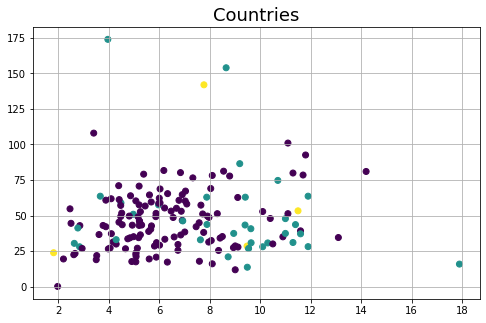

In [10]:
plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X.iloc[:,2],X.iloc[:,3], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc= sc.fit_transform(X)

In [12]:
print(X_sc)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


In [13]:

pca = PCA(n_components= 4)
X_pca = pca.fit_transform(X_sc)
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162])

In [14]:
k_means= cluster.KMeans(n_clusters= 3)
k_means.fit(X_pca)
k_means.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

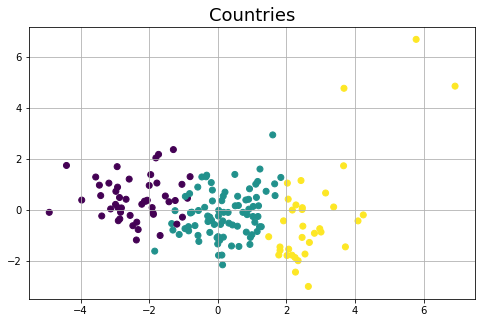

In [15]:


plt.figure(figsize=(8,5))
plt.title("Countries", fontsize=18)
plt.grid(True)
plt.scatter(X_pca[:,0],X_pca[:,1], c=k_means.labels_)
plt.savefig('Countries.png', dpi=300)
plt.show()



In [16]:
country['Category']= k_means.labels_

In [17]:
print(country.head(n= 30))

                   country  child_mort  exports  ...  total_fer   gdpp  Category
0              Afghanistan        90.2    10.00  ...       5.82    553         0
1                  Albania        16.6    28.00  ...       1.65   4090         1
2                  Algeria        27.3    38.40  ...       2.89   4460         1
3                   Angola       119.0    62.30  ...       6.16   3530         0
4      Antigua and Barbuda        10.3    45.50  ...       2.13  12200         1
5                Argentina        14.5    18.90  ...       2.37  10300         1
6                  Armenia        18.1    20.80  ...       1.69   3220         1
7                Australia         4.8    19.80  ...       1.93  51900         2
8                  Austria         4.3    51.30  ...       1.44  46900         2
9               Azerbaijan        39.2    54.30  ...       1.92   5840         1
10                 Bahamas        13.8    35.00  ...       1.86  28000         1
11                 Bahrain  

In [18]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_pca, k_means.labels_))

Silhouette Coefficient: 0.334


In [19]:
country.loc[country['Category']==1, 'Country_Group']= 'Under Developing Country'
country.loc[country['Category']==2, 'Country_Group']= 'Developing Country'
country.loc[country['Category']==0, 'Country_Group']= 'Developed Country'

In [20]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Category,Country_Group
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,Developed Country
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,Under Developing Country
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Under Developing Country
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,Developed Country
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,Under Developing Country


In [21]:
df_2 = pd.DataFrame()

df_2['Country']= country['country']
df_2['Category']= country['Country_Group']

In [22]:
df_2.to_csv(r'/content/drive/MyDrive/lab6_task7_output.csv', index = False)

FileNotFoundError: ignored